(64, 64)


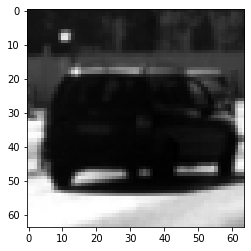

In [1]:
import os
import cv2
import joblib
import numpy as np
from skimage import feature
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

img = cv2.imread('2.png')  #Read vehicle image
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Converting previous image to GRAY
plt.imshow(img,cmap='gray')
print(img.shape) #imamge size 64 x 64 pixels

(64, 64)
(2916,)


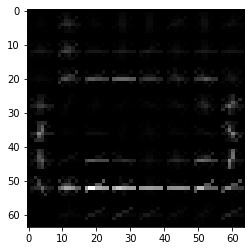

In [26]:
hog_vector,hog_img = feature.hog(img,visualize=True) #Get hog feature vector and hog image using skimage feature library
plt.imshow(hog_img,cmap='gray') #Corresponding HOG image to input image
print(hog_img.shape) #Get the size of hog Image
print(hog_vector.shape) #Get the size of hog vector

In [27]:
data_path=r'D:\4TH YEAR\REserch\DATA SET\archive\data' #Data set path (vehicle and non-vehicle images)
categories=os.listdir(data_path) #category types in the dataset (vehicle and non-vehicle)
print(categories)
labels=np.arange(len(categories)) #train folder contain two categories vehicle and non vehicle
print(labels) #in those folder, corresponding images are stored
label_dict=dict(zip(categories,labels)) #non vehicle as 0 and vehicle as 1
print(label_dict)

['non-vehicles', 'vehicles']
[0 1]
{'non-vehicles': 0, 'vehicles': 1}


In [28]:
img_size=64 
data=[] #Define array to store images
target=[] #Define array to store images class

for category in categories:  #Creating a function to run the below process through the selected folders
    
    imgs_path=os.path.join(data_path,category) #Select a folder and run below funtion through the images in the folder(vehicle and non-vehicle)
    img_names=os.listdir(imgs_path)
    print(imgs_path)
    
    for img_name in img_names: #apply preprocessing to data in dataset
        
        img_path=os.path.join(imgs_path,img_name) #select image by image in the folder
        print(img_path)
        try:
            img=cv2.imread(img_path) #Read images in selected folder
            img=cv2.resize(img,(img_size,img_size)) #Resize the image before applying any filters
            gray1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Converting the image to GRAY because colour is not a feature to a vehicle
            gray = cv2.GaussianBlur(gray1,(5,5),2.0) #Add GaussianBlur to reduce noise in image
            data.append(gray) #Append those images to data predefined array
            target.append(label_dict[category]) #Append previous image category into target predefined array
           
        except Exception as e:
            print(img_path,e)

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra10.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra100.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1000.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1001.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1002.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1003.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1004.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1005.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1006.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1007.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1008.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1009.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1177.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1178.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1179.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra118.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1180.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra119.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra12.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra120.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1203.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1204.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1205.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1206.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1207.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1208.png
D:\4TH YEAR\REserch\DATA SET\archive\da

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1342.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1343.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1344.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1345.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1346.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1347.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1348.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1349.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra135.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1350.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1351.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1352.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1353.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1354.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1502.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1503.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1504.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1505.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1506.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1507.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1508.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1509.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra151.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1510.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1511.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1512.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1513.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1514.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1644.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1645.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1646.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1647.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1648.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1649.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra165.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1650.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1651.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1652.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1653.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1654.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1655.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1656.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1781.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1782.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1783.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1784.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1785.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1786.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1787.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1788.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1789.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra179.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1790.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1791.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1792.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1793.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1966.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1967.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1968.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1969.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra197.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1970.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1971.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1972.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1973.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1974.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1975.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1976.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1977.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1978.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2105.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2106.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2107.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2108.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2109.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra211.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2110.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2111.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2112.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2113.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2114.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2115.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2116.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2117.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2269.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra227.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2270.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2271.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2272.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2273.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2274.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2275.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2276.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2277.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2278.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2279.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra228.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2280.png
D:\4TH YEAR\REserch\DATA SET\archive

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2411.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2412.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2413.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2414.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2415.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2416.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2417.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2418.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2419.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra242.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2420.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2421.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2422.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2423.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2532.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2533.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2534.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2535.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2536.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2537.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2538.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2539.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra254.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2540.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2541.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2542.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2543.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2544.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2651.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2652.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2653.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2654.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2655.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2656.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2657.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2658.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2659.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra266.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2660.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2661.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2662.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2663.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2768.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2769.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra277.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2770.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2771.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2772.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2773.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2774.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2775.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2776.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2777.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2778.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2779.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra278.png
D:\4TH YEAR\REserch\DATA SET\archive

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2888.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2889.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra289.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2890.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2891.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2892.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2893.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2894.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2895.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2896.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2897.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2898.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra2899.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra29.png
D:\4TH YEAR\REserch\DATA SET\archive\

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3092.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3093.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3094.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3095.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3096.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3097.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3098.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3099.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra310.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3100.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3101.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3102.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3103.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3104.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra322.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3220.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3221.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3222.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3223.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3224.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3225.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3226.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3227.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3228.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3229.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra323.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3230.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3231.png
D:\4TH YEAR\REserch\DATA SET\archive

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3335.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3336.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3337.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3338.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra334.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3340.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3341.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3342.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3343.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3344.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3345.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3346.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3347.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3348.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3459.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra346.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3460.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3461.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3462.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3463.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3464.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3465.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3466.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3467.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3468.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3469.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra347.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3470.png
D:\4TH YEAR\REserch\DATA SET\archive

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3588.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3589.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra359.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3590.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3591.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3592.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3593.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3594.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3595.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3596.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3597.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3598.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3599.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra36.png
D:\4TH YEAR\REserch\DATA SET\archive\

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3704.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3705.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3706.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3707.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3708.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3709.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra371.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3710.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3711.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3712.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3713.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3714.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3715.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3716.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3826.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3827.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3828.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3829.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra383.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3830.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3831.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3832.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3833.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3834.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3835.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3836.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3837.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3838.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3945.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3946.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3947.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3948.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3949.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra395.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3950.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3951.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3953.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3954.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3955.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3956.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3957.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra3958.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra406.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4060.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4061.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4062.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4063.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4064.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4065.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4066.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4067.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4068.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4069.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra407.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4070.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4071.png
D:\4TH YEAR\REserch\DATA SET\archive

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4172.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4173.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4174.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4175.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4176.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4177.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4178.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4179.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra418.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4180.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4181.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4182.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4183.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4184.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4380.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4381.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4382.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4383.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4384.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4385.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4386.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4387.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4388.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4389.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra439.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4390.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4391.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4392.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4489.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra449.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4490.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4491.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4492.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4493.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4494.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4495.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4496.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4497.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4498.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4499.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra45.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra450.png
D:\4TH YEAR\REserch\DATA SET\archive\d

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4607.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4608.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4609.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra461.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4610.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4611.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4612.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4613.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4614.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4615.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4616.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4617.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4618.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4619.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4748.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4749.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra475.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4750.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4751.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4752.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4753.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4754.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4755.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4756.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4757.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4758.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4759.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra476.png
D:\4TH YEAR\REserch\DATA SET\archive

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra487.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4870.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4871.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4872.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4873.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4874.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4875.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4876.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4877.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4878.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4879.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra488.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4880.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra4881.png
D:\4TH YEAR\REserch\DATA SET\archive

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5016.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5017.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5018.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5019.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra502.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5020.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5021.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5022.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5023.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5024.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5025.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5026.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5027.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5028.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5165.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5166.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5167.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5168.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5169.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra517.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5170.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5171.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5172.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5173.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5174.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5175.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5176.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5177.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra529.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5290.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5291.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5292.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5293.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5294.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5295.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5296.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5297.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5298.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5299.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra53.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra530.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5300.png
D:\4TH YEAR\REserch\DATA SET\archive\d

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5408.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5409.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra541.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5410.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5411.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5412.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5413.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5414.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5415.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5416.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5417.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5418.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5419.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra542.png
D:\4TH YEAR\REserch\DATA SET\archive

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5538.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5539.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra554.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5540.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5541.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5542.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5543.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5544.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5545.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5546.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5547.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5548.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5549.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra555.png
D:\4TH YEAR\REserch\DATA SET\archive

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5653.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5654.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5655.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5656.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5657.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5658.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5659.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra566.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5660.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5661.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5662.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5663.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5664.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra5665.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra58.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra580.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra581.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra582.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra583.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra584.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra585.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra586.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra587.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra588.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra589.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra59.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra590.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra591.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehi

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra699.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra7.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra70.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra700.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra701.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra702.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra703.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra704.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra705.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra706.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra707.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra708.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra709.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra71.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicl

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra823.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra824.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra825.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra826.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra827.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra828.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra829.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra830.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra831.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra832.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra833.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra834.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra835.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra836.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-ve

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra98.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra980.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra981.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra982.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra983.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra984.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra985.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra986.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra987.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra988.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra989.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra99.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra990.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra991.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehi

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1097.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1098.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1099.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image11.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image110.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1100.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1101.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1102.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1103.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1104.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1105.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1106.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1107.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1108.png
D:\4TH YEAR\REserch\DATA SET\archive\

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image121.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1210.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1211.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1212.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1213.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1214.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1215.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1216.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1217.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1218.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1219.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image122.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1220.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1221.png
D:\4TH YEAR\REserch\DATA SET\archive

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1330.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1331.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1332.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1333.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1334.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1335.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1336.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1337.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1338.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1339.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image134.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1340.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1341.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1342.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1446.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1447.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1448.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1449.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image145.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1450.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1451.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1452.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1453.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1454.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1455.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1456.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1457.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1458.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1564.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1565.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1566.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1567.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1568.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1569.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image157.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1570.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1571.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1572.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1573.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1574.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1575.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1576.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1689.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image169.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1690.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1691.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1692.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1693.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1694.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1695.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1696.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1697.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1698.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1699.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image17.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image170.png
D:\4TH YEAR\REserch\DATA SET\archive\d

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1835.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1836.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1837.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1838.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1839.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image184.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1840.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1841.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1842.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1843.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1844.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1845.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1846.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1847.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1956.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1957.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1958.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1959.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image196.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1960.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1961.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1962.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1963.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1964.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1965.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1966.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1967.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image1968.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2068.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2069.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image207.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2070.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2071.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2072.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2073.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2074.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2075.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2076.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2077.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2078.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2079.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image208.png
D:\4TH YEAR\REserch\DATA SET\archive

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2192.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2193.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2194.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2195.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2196.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2197.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2198.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2199.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image22.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image220.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2200.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2201.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2202.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2203.png
D:\4TH YEAR\REserch\DATA SET\archive\

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2326.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2327.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2328.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2329.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image233.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2330.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2331.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2332.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2333.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2334.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2335.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2336.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2337.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2338.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2435.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2436.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2437.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2438.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2439.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image244.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2440.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2441.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2442.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2443.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2444.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2445.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2446.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2447.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2555.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2556.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2557.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2558.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2559.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image256.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2560.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2561.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2562.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2563.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2564.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2565.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2566.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2567.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2674.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2675.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2676.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2677.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2678.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2679.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image268.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2680.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2681.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2682.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2683.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2684.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2685.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2686.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2812.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2813.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2814.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2815.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2816.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2817.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2818.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2819.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image282.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2820.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2821.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2822.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2823.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2824.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2922.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2923.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2924.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2925.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2926.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2927.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2928.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2929.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image293.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2930.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2931.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2932.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2933.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image2934.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3041.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3042.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3043.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3044.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3045.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3046.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3047.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3048.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3049.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image305.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3050.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3051.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3052.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3053.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3183.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3184.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3185.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3186.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3187.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3188.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3189.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image319.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3190.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3191.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3192.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3193.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3194.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3195.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3300.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3301.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3302.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3303.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3304.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3305.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3306.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3307.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3308.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3309.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image331.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3310.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3311.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3312.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3423.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3424.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3425.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3426.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3427.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3428.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3429.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image343.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3430.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3431.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3432.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3433.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3434.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3435.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3552.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3553.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3554.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3555.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3556.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3557.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3558.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3559.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image356.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3560.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3561.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3562.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3563.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3564.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3664.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3665.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3666.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3667.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3668.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3669.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image367.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3670.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3671.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3672.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3673.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3674.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3675.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3676.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3775.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3776.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3777.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3778.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3779.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image378.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3780.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3781.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3782.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3783.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3784.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3785.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3786.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3787.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3883.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3884.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3885.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3886.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3887.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3888.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3889.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image389.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3890.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3891.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3892.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3893.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3894.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image3895.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image489.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image49.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image490.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image491.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image492.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image493.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image494.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image495.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image496.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image497.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image498.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image499.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image5.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image50.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicl

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image614.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image615.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image616.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image617.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image618.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image619.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image62.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image620.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image621.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image622.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image623.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image624.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image625.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image626.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-veh

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image74.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image740.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image741.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image742.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image743.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image744.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image745.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image746.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image747.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image748.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image749.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image75.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image750.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image751.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehi

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image880.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image881.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image882.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image883.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image884.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image885.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image886.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image887.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image888.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image889.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image89.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image890.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image891.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\image892.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-veh

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\10.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1000.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1001.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1002.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1003.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1004.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1005.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1006.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1007.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1008.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1009.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\101.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1010.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1011.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1012

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1125.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1126.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1127.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1128.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1129.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\113.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1130.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1131.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1132.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1133.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1134.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1135.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1136.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1137.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1138.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1139.png
D:\4TH YEAR\REserch\DATA SET\archive\data

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1271.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1272.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1273.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1274.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1275.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1276.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1277.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1278.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1279.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\128.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1280.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1281.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1282.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1283.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1284.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1285.png
D:\4TH YEAR\REserch\DATA SET\archive\data

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1454.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1455.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1456.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1457.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1458.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1459.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\146.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1460.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1461.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1462.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1463.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1464.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1465.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1466.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1467.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1468.png
D:\4TH YEAR\REserch\DATA SET\archive\data

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1598.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1599.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\16.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\160.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1600.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1601.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1602.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1603.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1604.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1605.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1606.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1607.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1608.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1609.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\161.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1610.png
D:\4TH YEAR\REserch\DATA SET\archive\data\ve

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1760.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1761.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1762.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1763.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1764.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1765.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1766.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1767.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1768.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1769.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\177.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1770.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1771.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1772.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1773.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1774.png
D:\4TH YEAR\REserch\DATA SET\archive\data

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1901.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1902.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1903.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1904.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1905.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1906.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1907.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1908.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1909.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\191.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1910.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1911.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1912.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1913.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1914.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\1915.png
D:\4TH YEAR\REserch\DATA SET\archive\data

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2064.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2065.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2066.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2067.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2068.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2069.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\207.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2070.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2071.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2072.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2073.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2074.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2075.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2076.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2077.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2078.png
D:\4TH YEAR\REserch\DATA SET\archive\data

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2236.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2237.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2238.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2239.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\224.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2240.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2241.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2242.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2243.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2244.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2245.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2246.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2247.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2248.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2249.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\225.png
D:\4TH YEAR\REserch\DATA SET\archive\data\

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2425.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2426.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2427.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2428.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2429.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\243.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2430.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2431.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2432.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2433.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2434.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2435.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2436.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2437.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2438.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2439.png
D:\4TH YEAR\REserch\DATA SET\archive\data

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2612.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2613.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2614.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2615.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2616.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2617.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2618.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2619.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\262.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2620.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2621.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2622.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2623.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2624.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2625.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2626.png
D:\4TH YEAR\REserch\DATA SET\archive\data

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2760.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2761.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2762.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2763.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2764.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2765.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2766.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2767.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2768.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2769.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\277.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2770.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2771.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2772.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2773.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2774.png
D:\4TH YEAR\REserch\DATA SET\archive\data

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2904.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2905.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2906.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2907.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2908.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2909.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\291.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2910.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2911.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2912.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2913.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2914.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2915.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2916.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2917.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\2918.png
D:\4TH YEAR\REserch\DATA SET\archive\data

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3053.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3054.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3055.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3056.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3057.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3058.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3059.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\306.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3060.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3061.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3062.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3063.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3064.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3065.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3066.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3067.png
D:\4TH YEAR\REserch\DATA SET\archive\data

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3217.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3218.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3219.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\322.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3220.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3221.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3222.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3223.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3224.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3225.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3226.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3227.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3228.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3229.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\323.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3230.png
D:\4TH YEAR\REserch\DATA SET\archive\data\

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3390.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3391.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3392.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3393.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3394.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3395.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3396.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3397.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3398.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3399.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\34.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\340.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3400.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3401.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3402.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3403.png
D:\4TH YEAR\REserch\DATA SET\archive\data\v

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3668.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3669.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\367.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3670.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3671.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3672.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3673.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3674.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3675.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3676.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3677.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3678.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3679.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\368.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3680.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3681.png
D:\4TH YEAR\REserch\DATA SET\archive\data\

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3842.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3843.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3844.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3845.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3846.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3847.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3848.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3849.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\385.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3850.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3851.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3852.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3853.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3854.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3855.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\3856.png
D:\4TH YEAR\REserch\DATA SET\archive\data

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4008.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4009.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\401.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4010.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4011.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4012.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4013.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4014.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4015.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4016.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4017.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4018.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4019.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\402.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4020.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4021.png
D:\4TH YEAR\REserch\DATA SET\archive\data\

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4170.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4171.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4172.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4173.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4174.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4175.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4176.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4177.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4178.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4179.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\418.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4180.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4181.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4182.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4183.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4184.png
D:\4TH YEAR\REserch\DATA SET\archive\data

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4331.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4332.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4333.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4334.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4335.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4336.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4337.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4338.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4339.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\434.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4340.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4341.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4342.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4343.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4344.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4345.png
D:\4TH YEAR\REserch\DATA SET\archive\data

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4480.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4481.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4482.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4483.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4484.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4485.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4486.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4487.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4488.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4489.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\449.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4490.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4491.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4492.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4493.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4494.png
D:\4TH YEAR\REserch\DATA SET\archive\data

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4629.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\463.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4630.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4631.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4632.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4633.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4634.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4635.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4636.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4637.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4638.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4639.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\464.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4640.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4641.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4642.png
D:\4TH YEAR\REserch\DATA SET\archive\data\

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4769.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\477.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4770.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4771.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4772.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4773.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4774.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4775.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4776.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4777.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4778.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4779.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\478.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4780.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4781.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4782.png
D:\4TH YEAR\REserch\DATA SET\archive\data\

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4893.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4894.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4895.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4896.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4897.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4898.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4899.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\49.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\490.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4900.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4901.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4902.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4903.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4904.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4905.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\4906.png
D:\4TH YEAR\REserch\DATA SET\archive\data\v

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5048.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5049.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\505.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5050.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5051.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5052.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5053.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5054.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5055.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5056.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5057.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5058.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5059.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\506.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5060.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5061.png
D:\4TH YEAR\REserch\DATA SET\archive\data\

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5205.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5206.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5207.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5208.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5209.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\521.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5210.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5211.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5212.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5213.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5214.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5215.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5216.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5217.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5218.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5219.png
D:\4TH YEAR\REserch\DATA SET\archive\data

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5363.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5364.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5365.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5366.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5367.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5368.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5369.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\537.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5370.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5371.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5372.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5373.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5374.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5375.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5376.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5377.png
D:\4TH YEAR\REserch\DATA SET\archive\data

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5623.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5624.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5625.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5626.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5627.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5628.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5629.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\563.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5630.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5631.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5632.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5633.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5634.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5635.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5636.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5637.png
D:\4TH YEAR\REserch\DATA SET\archive\data

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5791.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5792.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5793.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5794.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5795.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5796.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5797.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5798.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5799.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\58.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\580.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5800.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5801.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5802.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5803.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5804.png
D:\4TH YEAR\REserch\DATA SET\archive\data\v

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5952.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5953.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5954.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5955.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5956.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5957.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5958.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5959.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\596.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5960.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5961.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5962.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5963.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5964.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5965.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\5966.png
D:\4TH YEAR\REserch\DATA SET\archive\data

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\739.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\74.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\740.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\741.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\742.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\743.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\744.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\745.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\746.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\747.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\748.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\749.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\75.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\750.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\751.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\752.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\753.png

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\924.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\925.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\926.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\927.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\928.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\929.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\93.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\930.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\931.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\932.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\933.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\934.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\935.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\936.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\937.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\938.png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\939.pn

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (145).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (146).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (147).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (148).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (149).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (15).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (150).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (151).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (152).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (153).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (154).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (155).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (156).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (157).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (158).png
D:\4TH YEAR\REserch\DATA S

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (298).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (299).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (3).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (30).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (300).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (301).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (302).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (303).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (304).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (305).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (306).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (307).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (308).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (309).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (31).png
D:\4TH YEAR\REserch\DATA SET\

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (471).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (472).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (473).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (474).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (475).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (476).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (477).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (478).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (479).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (48).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (480).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (481).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (482).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (483).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (484).png
D:\4TH YEAR\REserch\DATA S

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (64).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (640).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (641).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (642).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (643).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (644).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (645).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (646).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (647).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (648).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (649).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (65).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (650).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (651).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (652).png
D:\4TH YEAR\REserch\DATA SE

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (814).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (815).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (816).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (817).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (818).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (819).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (82).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (820).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (821).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (822).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (823).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (824).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (825).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (826).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\far (827).png
D:\4TH YEAR\REserch\DATA S

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (226).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (227).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (228).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (229).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (23).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (230).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (231).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (232).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (233).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (234).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (235).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (236).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (237).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (238).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (239).png
D:\4TH YEAR

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (388).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (389).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (39).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (390).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (391).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (392).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (393).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (394).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (395).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (396).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (397).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (398).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (399).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (4).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (40).png
D:\4TH YEAR\RE

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (563).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (564).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (565).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (566).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (567).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (568).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (569).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (57).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (570).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (571).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (572).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (573).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (574).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (575).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (576).png
D:\4TH YEAR

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (728).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (729).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (73).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (730).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (731).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (732).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (733).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (734).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (735).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (736).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (737).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (738).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (739).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (74).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (740).png
D:\4TH YEAR\

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (879).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (88).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (880).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (881).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (882).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (883).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (884).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (885).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (886).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (887).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (888).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (889).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (89).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (890).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\left (891).png
D:\4TH YEAR\

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\middle (273).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\middle (274).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\middle (275).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\middle (276).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\middle (277).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\middle (278).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\middle (279).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\middle (28).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\middle (280).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\middle (281).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\middle (282).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\middle (283).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\middle (284).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\middle (285).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicle

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\middle (390).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\middle (391).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\middle (392).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\middle (393).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\middle (394).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\middle (395).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\middle (396).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\middle (397).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\middle (398).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\middle (399).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\middle (4).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\middle (40).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\middle (400).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\middle (401).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (201).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (202).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (203).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (204).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (205).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (206).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (207).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (208).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (209).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (21).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (210).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (211).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (212).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (213).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (214).

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (315).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (316).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (317).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (318).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (319).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (32).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (320).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (321).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (322).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (323).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (324).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (325).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (326).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (327).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (328).

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (469).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (47).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (470).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (471).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (472).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (473).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (474).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (475).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (476).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (477).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (478).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (479).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (48).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (480).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (481).p

D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (612).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (613).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (614).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (615).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (616).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (617).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (618).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (619).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (62).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (620).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (621).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (622).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (623).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (624).png
D:\4TH YEAR\REserch\DATA SET\archive\data\vehicles\right (625).

In [29]:
data_new=np.array(data) #Converting data into numpy array and renaming it to data_new
target_new=np.array(target) #Converting target into numpy array and renaming it to target_new
print(data_new.shape) #Get the shape of the data_new numpy array
print(target_new.shape) #Get the shape of the target_new numpy array

(17756, 64, 64)
(17756,)


0


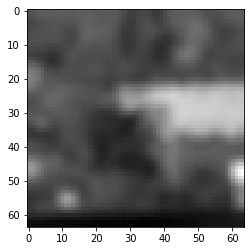

In [30]:
plt.imshow(data_new[123],cmap='gray') #Testing 123 image of the renamed array
print(target_new[123]) #Testing 123 image's class of the renamed array

In [2]:
#np.save('data12345',data_new) #Saving data_new array 
#np.save('target12345',target_new) #Saving target new array


data = np.load('data12345.npy') #Load data_new array
target = np.load('target12345.npy') #Load target_new array

In [3]:
data_new  = np.array([feature.hog(im) for im in data])#extracting hog feature in every image in the data 


#data_new  = np.array([cv2.Canny(im,100,200) for im in data])
#data_new = data_new.reshape(17760,4096)


#knn  = cv2.getGaborKernel((5,5),3,1*np.pi/4,1*np.pi/4,0.5,0,ktype=cv2.CV_32F)

#data_new  = np.array([cv2.filter2D(im,cv2.CV_8UC3,knn) for im in data])
#data_new = data_new.reshape(17760,4096)






print(data_new.shape) #There were 17760 images in the array and 2916 features i ''

(17756, 2916)


In [4]:
train_data,test_data,train_target,test_target=train_test_split(data_new,target,test_size=0.1) #Splitting data from train set to test 
#trainx,testx,trainy,testy                                      x        y
print(train_data.shape) #Getting the size of each set
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(15980, 2916)
(1776, 2916)
(15980,)
(1776,)


In [5]:
import pandas as pd
import sklearn
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.svm import SVC

In [6]:
model = SVC(kernel='linear') #Apply linear support vector machine to given data set to classify data into two categories
model.fit(train_data,train_target)

SVC(kernel='linear')

In [7]:
predicted_target = model.predict(test_data) #Tesing accuracy in linear svm 

acc = accuracy_score(test_target,predicted_target)
print(acc)

0.9583333333333334


[[849  34]
 [ 40 853]]


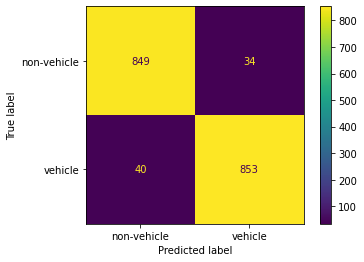

In [8]:
matrix = confusion_matrix(test_target,predicted_target) #for the testing, getting the confusion matrix
print(matrix)
display = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=['non-vehicle','vehicle'])
display.plot()

In [9]:
from sklearn.metrics import classification_report

print(classification_report(test_target,predicted_target,target_names=['vehicle', 'non-vehicle']))

              precision    recall  f1-score   support

     vehicle       0.96      0.96      0.96       883
 non-vehicle       0.96      0.96      0.96       893

    accuracy                           0.96      1776
   macro avg       0.96      0.96      0.96      1776
weighted avg       0.96      0.96      0.96      1776



In [9]:
joblib.dump(model,'ML_Algo_VehicleDetection_SupportVector_linear.sav')

['ML_Algo_VehicleDetection_SupportVector_linear.sav']

In [2]:
model = joblib.load('ML_Algo_VehicleDetection_SupportVector_linear.sav')

In [26]:
def detect(img,h=64,w=64,slide=16): #Creating sliding window tecnique to identify images in selected image
    coordinates=[] #Define coordinated function 
    for y in range (0,img.shape[0]-h,slide): #Reduce hight from image shape
        for x in range(0,img.shape[1]-w,slide): #Reducing width form image shape
            window = img[y:y+h,x:x+w] #Getting a patch for identify the vehicles
            #print(patch.shape)
            hog_img = feature.hog(window) #Applying patch to hog feature which saved in vehicle detection model
            label=model.predict([hog_img]) #Applying predictions
            
            if(label==1):
                coordinates.append((x,y,w,h))
    return np.array(coordinates)

(256, 256, 3)


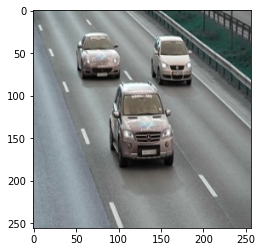

In [27]:
test_img = cv2.imread('888.jpg') #Testing above sliding window tecnique to this test image test, dd, cc
test_img = cv2.resize(test_img,(256,256)) #Resizing the testing image
print(test_img.shape) #Get the image shape in tesing
plt.imshow(test_img,cmap='gray') #Show testing image

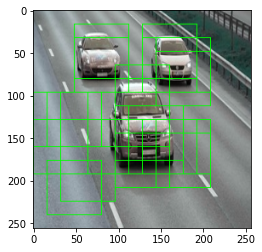

In [28]:
gray = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY) #Converting test image to GRAY
vehicle = detect(gray) #Apply detect function to image
for x,y,w,h in vehicle:
    
    cv2.rectangle(test_img,(x,y),(x+w,y+h),(0,255,0),1) #Apply rectangle to vehicles in the image
    
#cv2.imshow('test_image',test_img) #Show test image with rectangle
#cv2.waitKey(0) #Close window using ESC
#cv2.destroyAllWindows()
plt.imshow(test_img)

In [11]:
source = cv2.VideoCapture('aa.mp4') #Testing above method to a video tt

while(True): #Creating a loop to run above function in every frame    
    ret,img = source.read() #Getting frames from video    
    img = cv2.resize(img,(0,0),fx=0.2,fy=0.2) #Resizing
    
    if(ret==False): #Apply the above function to video same as the above test image
        break
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    vehicle = detect(gray)
    
    for x,y,w,h in vehicle:    
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)    
    cv2.imshow('img',img)
    k=cv2.waitKey(1)
    if(k==27):
        break

cv2.destroyAllWindows()
source.release()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
